<h1 style="color:rgb(0,120,170)">Neural Networks and a Glimpse at Pytorch </h1>



For XOR, by definition, one X must be 1 and other X must be 0, but not both. 
Thus, we following inequalities must hold:

$$ \textrm{Let t be a threshold for classification decision} $$

$$ 1\mathbf{w_1} + 0\mathbf{w_2} >= \mathbf{t} $$
$$ 0\mathbf{w_1} + 1\mathbf{w_2} >= \mathbf{t} $$
$$ 0\mathbf{w_1} + 0\mathbf{w_2} < \mathbf{t} $$
$$ 1\mathbf{w_1} + 1\mathbf{w_2} < \mathbf{t} $$

Assumption is that single-layer perceptron must be able to separate classes by single straight line to handle XOR:
$$ \mathbf{w_1} >= \mathbf{t} $$
$$ \mathbf{w_2} >= \mathbf{t} $$
$$ \mathbf{t} > 0 $$
$$ \mathbf{w_1} + \mathbf{w_2} < \mathbf{t} $$

We reach up to a point, where it is impossible to have weights for correct classification. Thus, single-layer perceptron is unable to linearly separate inputs $\mathbf{x}_1 = (0,0)$, $\mathbf{x}_2 = (1,0)$, $\mathbf{x}_3 = (0,1)$, and $\mathbf{x}_4 = (1,1)$

<h3 style="color:rgb(210,90,80)">Calculation</h3>

$ \mathbf{h} = \begin{pmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{pmatrix} \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} + \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} = \begin{pmatrix} w_{11} * x_1 +  w_{12} * x_2 \\ w_{21} * x_1 +  w_{22} * x_2 \end{pmatrix} + \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix}$

Calculate first layer's output:

$ \textrm{ x1 = (0,0)} $
$$ \mathbf{h_1} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix} = \begin{pmatrix} 0 \\ -1 \end{pmatrix}$$

$ \textrm{ x2 = (1,0)} $
$$ \mathbf{h_2} = \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$$

$ \textrm{ x3 = (0,1)} $
$$ \mathbf{h_3} = \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$$

$ \textrm{ x4 = (1,1)} $
$$ \mathbf{h_4} = \begin{pmatrix} 2 \\ 2 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix} = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$$

After applying ReLU, only x1's values are changed to 0

Calculate second layer's output:

$$ \mathbf{W_2^T} * \mathbf{h_1} = \begin{pmatrix} 1 & -2 \end{pmatrix} * \begin{pmatrix} 0 \\ 0 \end{pmatrix} = 0 $$
$$ \mathbf{W_2^T} * \mathbf{h_2} = \mathbf{W_2^T} * \mathbf{h_3} = \begin{pmatrix} 1 & -2 \end{pmatrix} * \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1 $$
$$ \mathbf{W_2^T} * \mathbf{h_4} = \begin{pmatrix} 1 & -2 \end{pmatrix} * \begin{pmatrix} 2 \\ 1 \end{pmatrix} = 0 $$

Expected results are identical to desired labels. Thus, XOR problem is solved using perceptron with hidden layer.


First compute all hidden neurons preactivations:

$$ \mathbf{s_3} = w_{31} * x_1 + w_{32} * x_2 = -0.1 * 1 + 0.5 * 2 = 0.9 $$
$$ \mathbf{s_4} = w_{41} * x_1 + w_{42} * x_2 = -1 * 1 + 0 * 2 = -1 $$
$$ \mathbf{s_5} = w_{51} * x_1 + w_{52} * x_2 = 0 * 1 + -2 * 2 = -4 $$

Compute all hidden neurons activations:

$ \mathbf{a_3} = 0.9, $ $ \mathbf{a_4} = 0, $ $ \mathbf{a_5} = 0 $

Compute output neuron's preactivation and activation:

$$ \mathbf{s_6} = \mathbf{a_6} = w_{63} * a_3 + w_{64} * a_4 + w_{65} * a_5 = 0.9 * 1 + 0 * (-1) + 0 * 0.5 = 0.9 $$

Loss:

$$ L(y, \hat{y}) = \frac{1}{2}(y - \hat{y})^2 = \frac{(1 - 0.9)^2)}{2} = 0.005 $$


Compute all hidden neurons deltas:

$ \delta_3 = -0.1 $, $ \delta_4 = \delta_5 = 0 $, $ \delta_6 = -0.1 $

Backprop comp. for w32:

$$ \frac{\partial L}{\partial w_{32}} = \delta_3 * a_2 = \delta_3 * x_2 = -0.1 * 2 = -0.2 $$

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Here we collect the hyperparameters we are going to use
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.01, momentum=0.5, seed=1, log_interval=100)
torch.manual_seed(args.seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [3]:
#just printout for deeper view
print(args)
print(device)

namespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.01, momentum=0.5, seed=1, log_interval=100)
cuda


In [4]:
# Data loader (downloads data automatically the first time)
# 0.1307 and 0.3081 are the mean and the std computed on the training set
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

26422272it [00:02, 10532279.01it/s]                              


Extracting .\..\data\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\..\data\FashionMNIST\raw



29696it [00:00, 1402256.73it/s]          

Extracting .\..\data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\..\data\FashionMNIST\raw


4422656it [00:00, 8536171.93it/s]                             


Extracting .\..\data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\..\data\FashionMNIST\raw



6144it [00:00, ?it/s]                   


Extracting .\..\data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\..\data\FashionMNIST\raw



torch.Size([60000])
torch.Size([60000, 28, 28])
Input dimension is 784.


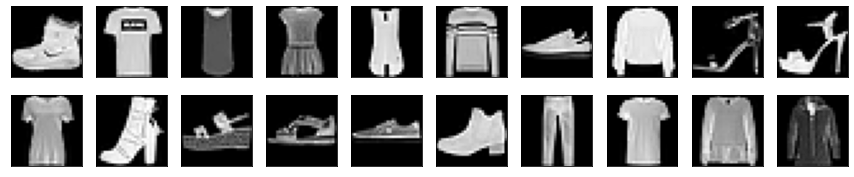

In [5]:
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.data.shape)
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
print("Input dimension is {}.".format(input_dim))
output_dim = 10

# Plot example images
fig=plt.figure(figsize=(15,3))
for image in range(20):
    show_img = train_loader.dataset.data[image].numpy().reshape(28, 28)
    fig.add_subplot(2,10,image+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(show_img, cmap='gray')
plt.show()

In [6]:
class ANN_sigmoid(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_sigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        x = self.linear3(x)
        x = torch.sigmoid(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)

In [7]:
class ANN_ReLU(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_ReLU, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.relu(x)
        x = self.linear3(x)
        x = torch.relu(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)

Next, we provide you with a routine for training a neural network with Pytorch. For each layer, it outputs a list where one entry indicates the averaged absolute sum of the gradient magnitudes of the activations for a particular mini batch of this particular layer. Note that the command loss.backward() automatically computes and stores the gradients of all the activations. It also prints accuracy and the loss value for each epoch.

In [8]:
# This function trains the model for one epoch

def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    grads1_list = []
    grads2_list = []
    grads3_list = []
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.view(-1, input_dim))
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        
        grads3 = abs(model.linear3.weight.grad)
        grads2 = abs(model.linear2.weight.grad)
        grads1 = abs(model.linear1.weight.grad)
        grads3_list.append(torch.mean(grads3).item())
        grads2_list.append(torch.mean(grads2).item())
        grads1_list.append(torch.mean(grads1).item())
        
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    print('\nTraining set: Accuracy: {}/{} ({:.2f}%)\n'.format(
    correct, len(train_loader.dataset),
    100. * correct / len(train_loader.dataset))) 
    return grads1_list, grads2_list, grads3_list

Here is a similar routine for the test procedure.

In [9]:
# This function evaluates the model on the test data
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = Variable(data.view(-1, input_dim))
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))    

<<< Sigmoid >>>

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.451870
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.321391
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.310726
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.317068
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.299262
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.258654
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.325197
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.305216
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.351811
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.281469

Training set: Accuracy: 6542/60000 (10.90%)



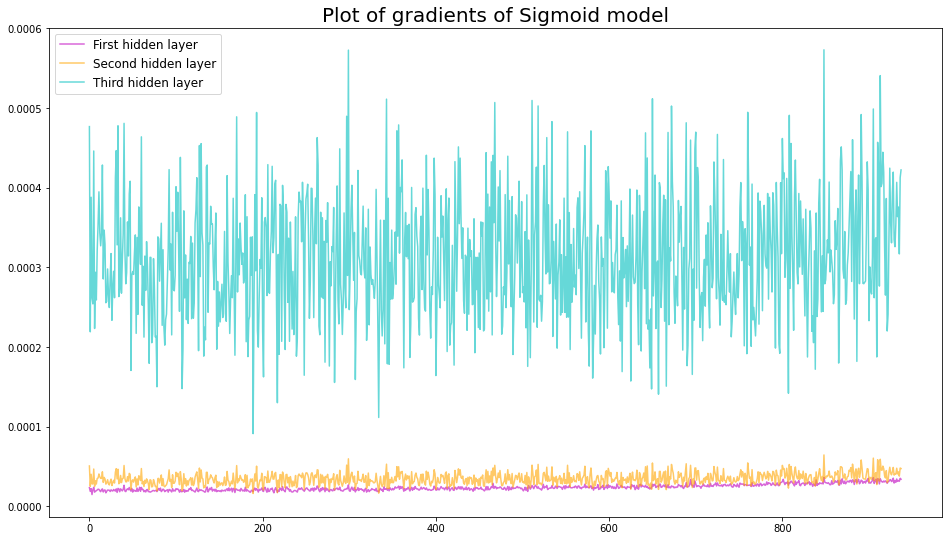

<<< ReLU >>>

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299823
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.135780
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.778205
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.681294
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.567666
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.594411
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.614767
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.433662
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.527224
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.480249

Training set: Accuracy: 44907/60000 (74.84%)



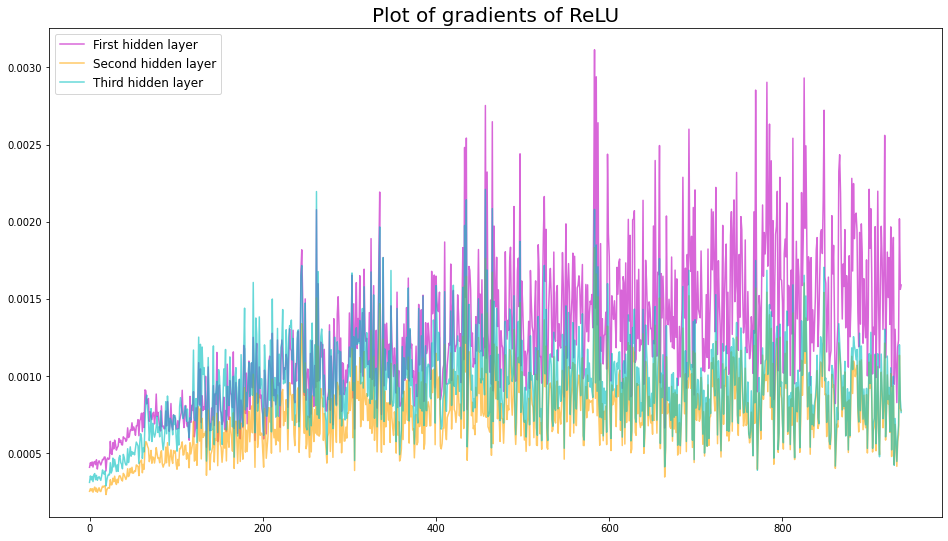

In [25]:
def gradient_plot(gradients: list, title: str):
    plt.figure(figsize=(16, 9))
    cmap = ['m', 'orange', 'c']
    lmap = ["First hidden layer", "Second hidden layer", "Third hidden layer"]
    for index in range(len(gradients)):
        plt.plot(np.array(gradients[index]), '-', color=cmap[index],label=lmap[index], alpha=0.6)
    plt.title(f'Plot of gradients of {title}', fontsize=20)
    plt.legend(loc='best', fontsize=12)
    plt.show()


print("<<< Sigmoid >>>\n")
model = ANN_sigmoid(input_dim, output_dim).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) #define SGD optimizer
epochs_range = [args.epochs] #range you will iterate over

for epoch in epochs_range:
    grads = train(args, model, device, train_loader, optimizer, epoch)
    gradient_plot(grads,'Sigmoid model')
    #now test your model
    
######################################################################################    
print("<<< ReLU >>>\n")
model = ANN_ReLU(input_dim, output_dim).to(device) #define your ReLU model
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) #redefine SGD optimizer

for epoch in epochs_range:
    grads = train(args, model, device, train_loader, optimizer, epoch)
    gradient_plot(grads,'ReLU')
    #repeat operations of the loop above, but for ReLU model
    pass